# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [41]:
import pandas as pd

from sklearn.linear_model import LogisticRegression            # clasificar, logistic regression model   

from sklearn.preprocessing import StandardScaler               # standarized
from sklearn.preprocessing import LabelEncoder               

from sklearn.model_selection import train_test_split as tts    # split data into train and test sets

## Regression Model Evaluation

In [42]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [43]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [44]:
X=data.drop(['MEDV'], axis=1)  # separacion X y

y=data.MEDV

In [45]:
X_train, X_test, y_train, y_test = tts(X, y,                 #aqui dividimos en 4
                                       train_size=0.8, 
                                       test_size=0.2,
                                       random_state=40)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [46]:
from sklearn.linear_model import LinearRegression as LinReg

In [47]:
linreg=LinReg()

In [48]:
linreg.fit(X_train, y_train) #entrenamiento del modelo

LinearRegression()

In [51]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [52]:
y_pred_test = linreg.predict(X_test)
y_pred_test

array([2.00412998, 2.57561917, 1.19769801, ..., 2.42460902, 1.73085934,
       1.35765516])

In [53]:
y_pred_train = linreg.predict(X_train)
y_pred_train

array([1.02421204, 1.5463696 , 1.34449633, ..., 1.99921332, 2.93284174,
       2.92399608])

## 3. Calculate and print R-squared for both the training and the testing set.

In [54]:
from sklearn.metrics import r2_score as r2
r2(y_test, y_pred_test)

0.6075794091011186

In [55]:
r2(y_train ,y_pred_train)

0.6056066227644388

## 4. Calculate and print mean squared error for both the training and the testing set.

In [56]:
from sklearn.metrics import mean_squared_error as mse  # error cuadratico medio

In [57]:
mse(y_test, y_pred_test)

0.5417517275769405

In [58]:
mse(y_train ,y_pred_train)

0.5202233101752236

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [59]:
from sklearn.metrics import mean_absolute_error as mae  # estos alias tmb son cosa mia

mae(y_test, y_pred_test)

0.5389572480554756

In [60]:
mae(y_train ,y_pred_train)

0.5287028186108879

## Classification Model Evaluation

In [61]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

In [62]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [63]:
X=data.drop('class', axis=1)  # separacion X y

y=data['class']

In [64]:
X_train, X_test, y_train, y_test = tts(X, y,                 #aqui dividimos en 4
                                       train_size=0.8, 
                                       test_size=0.2,
                                       random_state=42)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [65]:
from sklearn.linear_model import LogisticRegression            # logistic regression model

In [67]:
logreg=LogisticRegression(max_iter=2000)

logreg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [68]:
y_pred_test =logreg.predict(X_test)   
y_pred_train = logreg.predict (X_train)

y_pred_test[:10], y_pred_train[:10]

(array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1]), array([0, 0, 2, 1, 1, 0, 0, 1, 2, 2]))

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [69]:
from sklearn.metrics import accuracy_score as acc
acc(y_test, y_pred_test)

1.0

In [70]:
acc(y_train, y_pred_train)

0.9642857142857143

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [71]:
from sklearn.metrics import balanced_accuracy_score

train_balanced_accuracy = balanced_accuracy_score(y_train, y_pred_train)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_pred_test)

print(train_balanced_accuracy)
print(test_balanced_accuracy)

0.9655870445344129
1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [81]:
from sklearn.metrics import precision_score as prec

prec(y_test, y_pred_test, average = 'macro')

1.0

In [82]:
prec(y_train, y_pred_train, average = 'macro')

0.9659909909909911

## 11. Calculate and print the recall score for both the training and the testing set.

In [83]:
from sklearn.metrics import recall_score as rec
rec(y_test, y_pred_test, average = 'macro')

1.0

In [84]:
rec(y_train, y_pred_train, average = 'macro')

0.9655870445344129

## 12. Calculate and print the F1 score for both the training and the testing set.

In [85]:
from sklearn.metrics import f1_score as f1
f1(y_test, y_pred_test, average = 'macro')

1.0

In [86]:
f1(y_train, y_pred_train, average = 'macro')

0.9653621232568601

## 13. Generate confusion matrices for both the training and the testing set.

In [87]:
from sklearn.metrics import confusion_matrix as cm
cm(y_test, y_pred_test)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

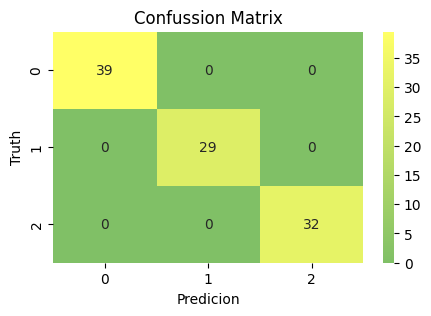

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(5, 3))

sns.heatmap(cm(y_test, y_pred_test)/cm(y_test, y_pred_test).sum() * 100, 
               annot=True,
               cmap='summer',
               center = 0 )

plt.title('Confussion Matrix')
plt.ylabel('Truth')
plt.xlabel('Predicion')
plt.show();

In [91]:
cm(y_train, y_pred_train)

array([[35,  0,  0],
       [ 0, 36,  3],
       [ 0,  1, 37]], dtype=int64)

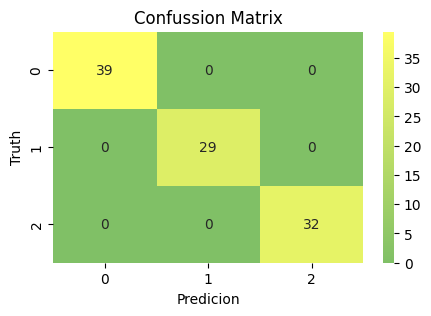

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(5, 3))

sns.heatmap(cm(y_test, y_pred_test)/cm(y_test, y_pred_test).sum() * 100, 
               annot=True,
               cmap='summer',
               center = 0 )

plt.title('Confussion Matrix')
plt.ylabel('Truth')
plt.xlabel('Predicion')
plt.show();

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.